# Unsupervised Learning Predict - Movie Recommender System Challenge
© Explore Data Science Academy

---
### Honour Code

We, **XXX** {**#Team_NM3**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents

#### Section 1: Data Pre-processing

<a href=#one>1.1 Importing Packages</a>

<a href=#two>1.2 Loading Data</a>

<a href=#three>1.3 Exploratory Data Analysis (EDA)</a>

<a href=#four>1.4 Data Engineering</a>

#### Section 2: Model Development and Analysis

<a href=#five>2.1 Modeling</a>

<a href=#six>2.2 Model Performance</a>

#### Section 3: Model Explanation and Conclusions

<a href=#seven>3.1 Model Explanations</a>

<a href=#seven>3.2 Conclusions</a>

# Introduction
In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity. 

This Notebook has been adapted and developed by **XXX** - a group of seven students from the July 2022 cohort of the Explore Ai Academy **Data Science** course. We are:

 > Josiah Aramide <br>
 > Bongani Mavuso <br>
 > Ndinannyi mukwevho <br>
 > Aniedi Oboho-Etuk <br>
 > Manoko Langa <br>
 > Tshepiso Padi <br>
 > Nsika Masondo <br>
 

### Problem Statement

The client is determined to improve its recommender system service offering to targeted consumer categories based on their movie content rating. 

Data from the historical viewing experiences, available to the company contains some preference and similarity characteristics that can ensure accurate prediction of consumer behaviour. 

By constructing a recommendation algorithm based on content or collaborative filtering, **XXX** team can develop a solution capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences. This solution can give the company access to immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.


### Objectives

**XXX** seeks to achieve the following objectives for the project brief:

- 1. analyse the supplied data;
- 2. identify underlying patterns and potential errors in the data and clean the existing data set;;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a recommendation algorithm based on content or collaborative filtering that is capable of capable of accurately predicting how a user will rate a movie they have not yet viewed;
- 5. evaluate the accuracy of the best machine learning model; and
- 6. explain the inner working of the model to a non-technical audience.

# Section 1: Data Pre-processing

This section describes steps for installing dependencies and requirements, initializing the experiment on Comet, importing packages, loading the two datasets - train and test datasets, conducting the exploratory data analysis (EDA) and implementing data engineering.

 <a id="one"></a>
## 1.1 Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Below are the libraries and tools imported for use in this project. The libraries include:
   - **numpy**: for working with arrays,
   - **pandas**: for tansforming and manipulating data in tables,
   - **matplotlib**: for creating interactive visualisations,
   - **seaborn**: for making statistical graphs and plots,
   - **scikit-learn**: for machine learning and statistical modeling, and
   - **math**: for algebraic notations and calculations.

---

In [1]:
!pip install comet_ml # Comet installation for Jupyter Notebook/Collab
!pip install git+https://github.com/microsoft/recommenders.git
!pip install kneed # knee (/elbow) point detection for cluster optimization
!pip install tf_slim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.9/450.9 kB 719.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.4/504.4 kB 2.6 MB/s eta 0:00:0000:0100:01
  Cloning https://github.com/microsoft/recommenders.git to /tmp/pip-req-build-umxzq0ls
  Running command git clone --filter=blob:none --quiet https://github.com/microsoft/recommenders.git /tmp/pip-req-build-umxzq0ls
  Resolved https://github.com/microsoft/recommenders.git to commit d110a1024d3044ee38059245b81383679d4569ea
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.6/636.6 kB 827.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.9/355.9 kB 6.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
# Libraries for data loading, data manipulation and data visulisation 
import numpy as np   # for working with 
import pandas as pd  # for data processing, CSV file I/O (e.g. pd.read_csv)
from recommenders.datasets.python_splitters import python_chrono_split
import matplotlib.pyplot as plt  # for making visualisations and plots
import seaborn as sns
import datetime as dt
import math
import time
import pickle
%matplotlib inline

# Libraries for collecting experiment parameters
import os
import warnings
warnings.filterwarnings("ignore")
import comet_ml
from comet_ml import Experiment

# Libraries for data engineering and model building
from sklearn import preprocessing
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Libraries for Building Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression #determine mutual info
from sklearn.datasets import make_blobs
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from recommenders.models.ncf.ncf_singlenode import NCF

import sys
from sys import exc_info
import ast

In [3]:
# Input data files are available in the Kaggle "../input/" directory.
# Thus, running this code cell will list all files under the input directory
# These file paths can be used to load the datasets into this notebook
for dirname, _, filenames in os.walk('/kaggle/input/edsa-movie-recommendation-predict'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-predict/movies.csv
/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-predict/train.csv
/kaggle/input/edsa-movie-recommendation-predict/test.csv
/kaggle/input/edsa-movie-recommendation-predict/tags.csv
/kaggle/input/edsa-movie-recommendation-predict/links.csv


In [4]:
# Create an instance of Comet experiment with TeamNM3's API key
experiment = Experiment(
    api_key="RpnzF8DcMSor3mXqAfEQqsXjv",
    project_name="unsupervised-learning-predict",
    workspace="teamnm3",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using Experiment.log_metrics() and Experiment.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/kaggle/working' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/teamnm3/unsupervised-learning-predict/48a15b5140ea4c97b605d099795f05de



<a id="two"></a>
## 1.2 Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, data is loaded from the **xxxxx** made available to **TeamNM3** by the client, **Explore-AI**. This involves reading the data from the `.csv` file format into a Pandas dataframe. The Pandas dataframe allows for easy views and manipulations of the data in the form of tables and can be combined with other python libraries like numpy for desirable results. |

---

In [5]:
# Store datasets in a Pandas Dataframe
df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')
df_mov = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')
df_gs = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv')
df_gt = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv')
df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')
df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/links.csv')
df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/tags.csv')

<a id="three"></a>
## 1.3 Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, an in-depth analysis (graphical and non-graphical) of the supplied data is conducted. This includes: 
 - viewing the matrix to determine the dimensions of the data;
 - identifying the features and target;
 - investigating the formatting of the data (types, nulls etc.)
 - viewing the xxx;
 - identifying the xxx;
 - analysing the xxx;
 .|

---

### 1.3.1 Viewing the matrix (dimensions) of the data
First, it is necessary to view the matrix of the supplied datasets to see the total number of rows, number of columns, the content and the format (datatypes) of the features within each of the datasets.

In [9]:
# Create a function to return the matrix of datasets
def data_matrix(df, label):
    '''
    df: (pd) pandas dataframe of the dataset
    label: (str) a string to describe the dataset name
    '''
    df.shape
    nRow, nCol = df.shape
    print(f'There are {nRow} rows and {nCol} columns in the {label} dataset')

In [10]:
data_matrix(df_train, 'train'), # Train dataset Matrix
data_matrix(df_test, 'test'), # Test dataset Matrix
data_matrix(df_mov, 'movies'), # Movie dataset Matrix
data_matrix(df_gs, 'genome_scores') # Genome scores dataset Matrix

There are 10000038 rows and 4 columns in the train dataset
There are 5000019 rows and 2 columns in the test dataset
There are 62423 rows and 3 columns in the movies dataset
There are 15584448 rows and 3 columns in the genome_scores dataset


In [11]:
data_matrix(df_gt, 'genome_tags') # Genome tags dataset Matrix
data_matrix(df_imdb, 'imdb') # IMDB dataset Matrix
data_matrix(df_links, 'links') # Links dataset Matrix
data_matrix(df_tags, 'tags') # Tags dataset Matrix

There are 1128 rows and 2 columns in the genome_tags dataset
There are 27278 rows and 6 columns in the imdb dataset
There are 62423 rows and 3 columns in the links dataset
There are 1093360 rows and 4 columns in the tags dataset


### OBSERVATION
- As the results show, the train dataset contains a little over **10 million** rows of data** in 4 columns of features. 
- The test dataset contains exactly half of that number of observations (**5,000,019**) with only 2 columns of features.

- Other datasets contain ...

Next, a peek view of some of the rows in the dataset should be of interest. This can be accomplished with the `pd.head()` command as seen in the code cell below. The command can take an argument specifying the number of rows to view (10 in this example), otherwise it returns the first 5 rows by default. 

In [12]:
# View top of datasets, train set

df_train.head(10)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
5,120949,81768,3.0,1289595242
6,19630,62049,4.0,1246729817
7,21066,2282,1.0,945785907
8,117563,120474,4.0,1515108225
9,144018,1997,5.0,1109967647


In [13]:
# looking at the test set
df_mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
df_gs.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [15]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


### OBSERVATION
- The output indicates that the `xxx` column (features) contains xxx. These will need to be addressed during the feature engineering phase in order to derive any usefulness from them.


In [ ]:
# Data Types and Non-null count 
df_train.info()

In [ ]:
# Confirm the Non-null count for train data
df_train.isnull().sum()

In [ ]:
# Confirm the Non-null count for imdb data
df_imdb.isnull().sum()

In [ ]:
# Summary Statistics of our train dataset
df_train.describe()

### OBSERVATION
- From above, it can be observed that the dataset appears to have no missing values. That is, the count of non-null rows equals the expected count of entries in the columns. 

In [ ]:
# check for duplicates in the train dataset
df_train[df_train.duplicated(keep=False)]

### OBSERVATION
 - It is immediately obvious that there are no duplicates in the train dataset, as seen from above output statement

### 1.3.2 Visualisation: Histogram and Distribution plot of features (showing outliers)

In [ ]:
# Visualize the distribution of each variable in the train dataset
plt.figure(figsize=(12,16))
for i, j in enumerate(df_train.describe().columns): # enumerate by columns
    plt.subplot(3,2, i+1)
    sns.distplot(x=df_train[j])
    plt.xlabel(j)
    plt.axvline(x=df_train[j].mean(),color='red',label='mean')
    plt.axvline(x=df_train[j].median(),color='blue',label='median',ls='--',lw=2.5)
    plt.title('{} Distribution'.format(j))
    plt.legend(['mean', 'median'])
    
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

### OBSERVATION

We observe that;
- In the userId and rating column graphs the medians and the means are the same
- whereas, in the movieId and timestamp graphs the means and medians are different
- In the movieId graph the median falls at the right outside of the left-skewed curve. This tells us that majority of movies were rated less than 20,000 times. We may consider those at the right of the median line as outliers

### 1.3.3 Visualisation: Boxplot of features (showing outliers)

In [ ]:
# Next, Visualize the boxplot of each variable in the train dataset.
plt.figure(figsize=(12,10))
for i, j in enumerate(df_train.describe().columns):
    plt.subplot(3,2, i+1)
    sns.boxplot(x=df_train[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
    
plt.show()

The __boxplot__ puts our earlier observation into a better perspective.
- we can see that both userId and rating have mean and medians as same value.
- values above the median in movieId can be considered outliers

In [ ]:
# compare features with similar boxplots on a scatter plot
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df_train.userId, y=df_train.timestamp)
plt.title('timestamp vs. userId Scatterplot')
plt.savefig('scatter.png')
plt.show()

### OBSERVATION

- Each dot is a userId rating along the time on the y-axis.
- The bigger the dot the higher the rating

Data should be scaled to make sense of the multivariate trends across features

In [ ]:
# check correlation among variables (multivariate analysis)
pairplot = sns.pairplot(df_train, corner=True)
plt.show(pairplot)

The __pairplot__ gives us the histogram and scatter plots in one graph.

The above graphs compare the pairplots of the train dataset taking into account the columns of the datasets

In [ ]:
# heatmap view of correlation among variables in the train dataset
correlation_metrics=df_train.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

### OBSERVATION

- The correlation graph shows the relationship degree amongst the vriable columns
- movieId and timestamp seems to have the stronger correlation

<a id="four"></a>
## 1.4 Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we conduct our feature engineering to: 
- clean identified errors from the dataset;
- enrich the dataset by creating new features;
- split the dataset into training and validation sets for use by selected models;
- standardize the dataset;
- 
- 

These steps follow the insights that were gathered earlier during the EDA phase.|

---

### 1.4.1 Preprocessing 1: Cleaning and Filtering (with Feature selection)
The first step is to begin organising the data cleaning exercise by building smart functions so that these can be recalled for cleaning both the training and testing datasets. Without this logical flow of cleaning the data, the exercise can quickly get very messy.

The __df_mov__ dataset

In [6]:
df_mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We observe the year 1995 attached to the top 5 movies. Most movie titles are in same format.

Let us strip off the year

In [7]:
# removing years in title
df_mov['title'] = df_mov.title.str.replace('(\(\d\d\d\d\))', '')
df_mov['title'] = df_mov['title'].apply(lambda x: x.strip())
df_mov.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


#### Select some features based on the timestamp median, simply to run a base model

In [71]:
# filter the train dataset to reduce the size
df_train_filtered = df_train[df_train.movieId < df_train.userId.median()][:]
df_train_filtered

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000032,132019,1914,4.0,938800640
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [72]:
# drop the rating column from the filtered train dataset
df_tr_no_rating = df_train_filtered.drop(['rating', 'timestamp'], axis=1)
df_tr_no_rating

,userId,movieId
0,5163,57669
1,106343,5
2,146790,5459
3,106362,32296
4,9041,366
...,...,...
10000032,132019,1914
10000034,140078,553
10000035,154807,56782
10000036,85805,327


__Copy Dataset__

To preserve the main dataset we create a copy for our modeling

In [73]:
ratings = df_train_filtered.copy()

movies_list = np.unique(ratings['movieId'])[:]
ratings = ratings.loc[ratings['movieId'].isin(movies_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')

Shape of ratings dataset is:  (8965356, 4) 

Max values in dataset are 
 userId       1.625410e+05
movieId      8.090800e+04
rating       5.000000e+00
timestamp    1.574327e+09
dtype: float64 

Min values in dataset are 
 userId               1.0
movieId              1.0
rating               0.5
timestamp    789652009.0
dtype: float64 



In [74]:
users_list = np.unique(ratings['userId'])[:]
ratings = ratings.loc[ratings['userId'].isin(users_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')
print('Total Users: ', np.unique(ratings['userId']).shape[0])
print('Total Movies which are rated by 100 users: ', np.unique(ratings['movieId']).shape[0])

Shape of ratings dataset is:  (8965356, 4) 

Max values in dataset are 
 userId       1.625410e+05
movieId      8.090800e+04
rating       5.000000e+00
timestamp    1.574327e+09
dtype: float64 

Min values in dataset are 
 userId               1.0
movieId              1.0
rating               0.5
timestamp    789652009.0
dtype: float64 

Total Users:  162480
Total Movies which are rated by 100 users:  15152


And finally, its done. We have a dataset of shape (447,4) which inlcudes 4+ ratings of 108 movies by 100 users. As we were started with 100 movies but when we extracted it for only first 100 users, it looks like that the movies from 84-200 were not rated by first 100 users.

As, now we are not worried for ratings column and further we have supposed that each movie which is rated 4+ by user is of his/her interest. So, if a movie is an interest of user 1 then that movie will also be interest of another user 2 of same taste. Now, we can drop this column as each movie is a fovourite for every user.

In [75]:
# drop the rating column from the filtered train dataset
df_tr_no_rating = ratings.drop(['rating', 'timestamp'], axis=1)
df_tr_no_rating

,userId,movieId
0,5163,57669
1,106343,5
2,146790,5459
3,106362,32296
4,9041,366
...,...,...
10000032,132019,1914
10000034,140078,553
10000035,154807,56782
10000036,85805,327


We then save to a .csv file format

In [76]:
df_tr_no_rating.to_csv('new_ratings.csv')

### 1.4.2 Preprocessing 2 - Standardization
In this step, the task is to complete preprocessing on the train and test datasets ahead of modeling. First, 

#### 1.4.2.1 Standardizing the features
Create a `stand` function to complete the task of standardization.

In [77]:
# defining global scaler objects
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

# scale the dataframe
train_scaled = ss.fit_transform(df_tr_no_rating)
scaled_df_train = pd.DataFrame(train_scaled, columns=['userId', 'movieId'])
scaled_df_train

,userId,movieId
0,-1.626027,2.500814
1,0.535863,-0.529269
2,1.400086,-0.242676
3,0.536269,1.167533
4,-1.543167,-0.510299
...,...,...
8965351,1.084477,-0.428956
8965352,1.256672,-0.500473
8965353,1.571383,2.454204
8965354,0.097033,-0.512348


##### view a plot of the 2D features

### Determine number of clusters with elbow method

In determining number of clusters (k) let us vary the number of clusters ( K ) between 1 to 12. With each value of K, we calculate WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

In [ ]:
###Decide n-cluster using Elbow Method
wcss=[]
k_range = range(1,12)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df_train)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
    
plt.xticks(k_range)
# plt.grid()
plt.title('Elbow Method for Determining Optimal Value of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.savefig('num_clust.png')
plt.show()

In [ ]:
# confirm K number selection with knee locator
kl = KneeLocator(range(1, 12), wcss, curve="convex", direction="decreasing")
kl.elbow


__Optimal Value__ of k = 4

With this level of cleaning concluded, the model building and development stage follows next.

# Section 2: Model Development and Analysis

This section describes the steps and processes involved in building models for the project as well as the analysis of the model performance in terms of their accuracy in accomplishing the classification task.

# <a id="five"></a>
## 2.1 Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, the **TeamNM3** team explored the following models for their skill and strengths with regards processing  was considered in the model development. The models include:

- 1. L
- 2. S 
---
The initial task is to build a base model using ...

In [ ]:
def moviesListForUsers(users, users_data):
    # users = a list of users IDs
    # users_data = a dataframe of users favourite movies or users watched movies
    users_movies_list = []
    for user in users:
        users_movies_list.append(str(list(users_data[users_data['userId'] == user]['movieId'])).split('[')[1].split(']')[0])
    return users_movies_list

The method moviesListForUsers returns us a list which will contain strings for each users favourite movies list. Later we will use CountVectorizer to extract the features of strings which contains list of movies.

Note: The method moviesListForUsers returns us list in the same order as users list. So to avoid trap, we will have users list in the descending order.

In above defined method, we need to have a list of users and users_data dataframe. As users_data is the dataframe we already have. Now, let prepair the users list

In [ ]:
users = np.unique(scaled_df_train['userId'])
print(users.shape)

Now, let prepair the list of movies list for each user.

In [ ]:
users_movies_list = moviesListForUsers(users, scaled_df_train)
print('Movies list for', len(users_movies_list), ' users')
print('A list of first 10 users favourite movies: \n', users_movies_list[:10])

Above is the list for first 10 users favourite movies list. First string contain first users favourite movies IDs, second for second users and so on. It looks that the list of 7th users favourite movies is larger than others.

Now, we'll prepair a sparse matrix for each user against each movie

If user has watched movie then 1, else 0

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def prepSparseMatrix(list_of_str):
    # list_of_str = A list, which contain strings of users favourite movies separate by comma ",".
    # It will return us sparse matrix and feature names on which sparse matrix is defined 
    # i.e. name of movies in the same order as the column of sparse matrix
    cv = CountVectorizer(token_pattern = r'[^\,\ ]+', lowercase = False)
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix.toarray(), cv.get_feature_names()

In [ ]:
sparseMatrix, feature_names = prepSparseMatrix(users_movies_list)

Now let put it into dataframe to have a more clear presentation. The format will be as columns will presents each movie and index will presents users IDs

In [ ]:
df_sparseMatrix = pd.DataFrame(sparseMatrix, index = users, columns = feature_names)
df_sparseMatrix

In [ ]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(sparseMatrix)

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [24]:
# inertia on the fitted data
kmeans.inertia_

98375.35873391376

We got an inertia value of almost 98375. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

Text(0, 0.5, 'Inertia')

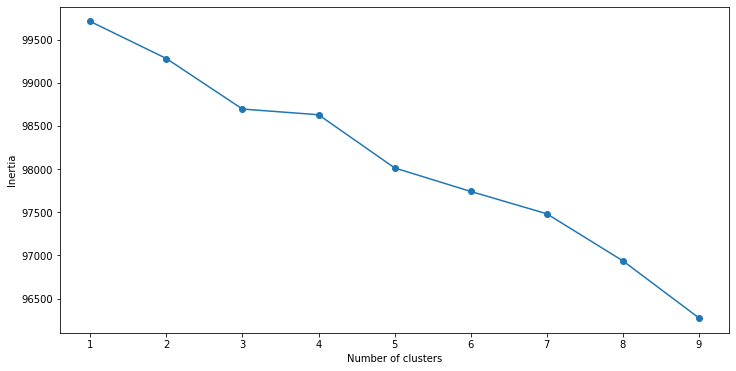

In [25]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(sparseMatrix)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [26]:
users_cluster = pd.DataFrame(np.concatenate((users.reshape(-1,1), clusters.reshape(-1,1)), axis = 1), columns = ['userId', 'Cluster'])
users_cluster.T

,0,1,2,3,4,5,6,7,8,9,...,56938,56939,56940,56941,56942,56943,56944,56945,56946,56947
userId,-1.73294,-1.732919,-1.732833,-1.732812,-1.732748,-1.732684,-1.73262,-1.732513,-1.732492,-1.732406,...,1.73475,1.734793,1.734857,1.734963,1.735049,1.73507,1.735091,1.735134,1.735155,1.735219
Cluster,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


We define a function which will create a list of dataframes where each dataframe will contain the movieId and the counts for that movie (count: the number of users who has that respective movie in their favourite list). So, the movie which will have more counts will be of more interest to other users who has not watched that movie yet.

For Example, we'll create a list as following
```[dataframe_for_Cluster_1, dataframe_for_Cluster_2, ..., dataframe_for_Cluster_3]```
where 3rd column of Count is representing the total number of users in the cluster who have watched that particular movie. So, we will sort movies by their count in order to priortise the movie which have most seen by users in cluster and is more favourite for users in the cluster.

Now we create a list of all user movies in each cluster. For this, first we'll define a method for creating movies of clusters.

In [28]:
def clustersMovies(users_cluster, users_data):
    clusters = list(users_cluster['Cluster'])
    each_cluster_movies = list()
    for i in range(len(np.unique(clusters))):
        users_list = list(users_cluster[users_cluster['Cluster'] == i]['userId'])
        users_movies_list = list()
        for user in users_list:    
            users_movies_list.extend(list(users_data[users_data['userId'] == user]['movieId']))
        users_movies_counts = list()
        users_movies_counts.extend([[movie, users_movies_list.count(movie)] for movie in np.unique(users_movies_list)])
        each_cluster_movies.append(pd.DataFrame(users_movies_counts, columns=['movieId', 'Count']).sort_values(by = ['Count'], ascending = False).reset_index(drop=True))
    return each_cluster_movies

Now, let take a look at any one dataframe of cluster_movies.

In [29]:
cluster_movies = clustersMovies(users_cluster, scaled_df_train)
cluster_movies[1].T

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
movieId,-1.41884,1.773703,-0.900363,-0.148689,-1.126457,-0.742926,-1.006899,0.498816,0.482244,0.46212,...,-0.515648,-0.514464,-0.491973,-0.488422,-0.449358,-0.361762,-0.294289,-0.25049,-0.233918,2.009267
Count,157.00000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


2 rows × 16 columns



Now, let see how much users we have in each cluster

In [30]:
for i in range(4):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users)

Users in Cluster 0 ->  55605
Users in Cluster 1 ->  157
Users in Cluster 2 ->  667
Users in Cluster 3 ->  519


Observe that clusters 1, 2, 3 have 1, 6 and 11 users respectively. There is need to fix such small clusters.

__Fixing Small Clusters__

We write a function to get user favourite movies list

In [31]:
def getMoviesOfUser(user_id, users_data):
    return list(users_data[users_data['userId'] == user_id]['movieId'])

define a function for fixing clusters

In [32]:
def fixClusters(clusters_movies_dataframes, users_cluster_dataframe, users_data, smallest_cluster_size = 11):
    # clusters_movies_dataframes: will be a list which will contain each dataframes of each cluster movies
    # users_cluster_dataframe: will be a dataframe which contain users IDs and their cluster no.
    # smallest_cluster_size: is a smallest cluster size which we want for a cluster to not remove
    each_cluster_movies = clusters_movies_dataframes.copy()
    users_cluster = users_cluster_dataframe.copy()
    # Let convert dataframe in each_cluster_movies to list with containing only movies IDs
    each_cluster_movies_list = [list(df['movieId']) for df in each_cluster_movies]
    # First we will prepair a list which containt lists of users in each cluster -> [[Cluster 0 Users], [Cluster 1 Users], ... ,[Cluster N Users]] 
    usersInClusters = list()
    total_clusters = len(each_cluster_movies)
    for i in range(total_clusters):
        usersInClusters.append(list(users_cluster[users_cluster['Cluster'] == i]['userId']))
    uncategorizedUsers = list()
    i = 0
    # Now we will remove small clusters and put their users into another list named "uncategorizedUsers"
    # Also when we will remove a cluster, then we have also bring back cluster numbers of users which comes after deleting cluster
    # E.g. if we have deleted cluster 4 then their will be users whose clusters will be 5,6,7,..,N. So, we'll bring back those users cluster number to 4,5,6,...,N-1.
    for j in range(total_clusters):
        if len(usersInClusters[i]) < smallest_cluster_size:
            uncategorizedUsers.extend(usersInClusters[i])
            usersInClusters.pop(i)
            each_cluster_movies.pop(i)
            each_cluster_movies_list.pop(i)
            users_cluster.loc[users_cluster['Cluster'] > i, 'Cluster'] -= 1
            i -= 1
        i += 1
    for user in uncategorizedUsers:
        elemProbability = list()
        user_movies = getMoviesOfUser(user, users_data)
        if len(user_movies) == 0:
            print(user)
        user_missed_movies = list()
        for movies_list in each_cluster_movies_list:
            count = 0
            missed_movies = list()
            for movie in user_movies:
                if movie in movies_list:
                    count += 1
                else:
                    missed_movies.append(movie)
            elemProbability.append(count / len(user_movies))
            user_missed_movies.append(missed_movies)
        user_new_cluster = np.array(elemProbability).argmax()
        users_cluster.loc[users_cluster['userId'] == user, 'Cluster'] = user_new_cluster
        if len(user_missed_movies[user_new_cluster]) > 0:
            each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'movieId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
    return each_cluster_movies, users_cluster

In [33]:
movies_df_fixed, clusters_fixed = fixClusters(cluster_movies, users_cluster, scaled_df_train, smallest_cluster_size = 6)



Now let take a look at list of movies dataframes

In [34]:
print('Size of movies dataframe after fixing -> ', len(movies_df_fixed))

Size of movies dataframe after fixing ->  4


Now, lets look at the sizes of clusters

In [35]:
for i in range(len(movies_df_fixed)):
    len_users = clusters_fixed[clusters_fixed['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users)

Users in Cluster 0 ->  55605
Users in Cluster 1 ->  157
Users in Cluster 2 ->  667
Users in Cluster 3 ->  519


Each cluster is now containing enough users so that we can make recommendations for other users. Let take a look at each size of clusters movies list.

In [36]:
for i in range(len(movies_df_fixed)):
    print('Total movies in Cluster ' + str(i) + ' -> ', movies_df_fixed[i].shape[0])

Total movies in Cluster 0 ->  2498
Total movies in Cluster 1 ->  214
Total movies in Cluster 2 ->  369
Total movies in Cluster 3 ->  414


As, we have done working with training machine learning model k-means, making predictions of clusters for each user and fixing some issues. Finally, we need to store this training so that we can use it later. For this, we will Pickle liabrary to save and load trainings. We have already imported Pickle, now we will use it.

Let me first design object to save and load trainings. We will directly design methods for saving/loading particular files and also we will design general save/load methods

__Predict__

We now predict the test dataset

In [ ]:

test_scaled = ss.fit_transform(df_test)
scaled_df_test = pd.DataFrame(test_scaled, columns=['userId', 'movieId'])
scaled_df_test

In [ ]:
users_test = np.unique(scaled_df_test['userId'])
print(users.shape)

In [ ]:
users_movies_list_test = moviesListForUsers(users_test, scaled_df_test)
print('Movies list for', len(users_movies_list_test), ' users')
print('A list of first 10 users favourite movies: \n', users_movies_list_test[:10])

In [ ]:
sparseMatrix_test, feature_names_test = prepSparseMatrix(users_movies_list_test)

In [ ]:
clusters_test = kmeans.fit(sparseMatrix_test)
clusters_test

In [ ]:
kmeans = KMeans(n_clusters = 9, init='k-means++')
pred_test = kmeans.fit_predict(sparseMatrix_test)

In [ ]:
pred_test

### 2.1.1 Overview of the Selected Models

### 2.1.2 Fit, Train and Predict with a base model
The first step of modeling involved fitting, training and predicting a base model of ...

### DISCUSSION
The two outputs above are 

### 2.1.3 Building other models 
With the base model fully operational, it is now reasonable to develop other models that can strengthen the recommendation system task. As with all the earlier stages of the data science process, functions are built to help enhance the functionality of training and testing the datasets.

#### 2.1.3.1 Create model objects for all models

#### 2.1.3.2 Create functions for training and testing all models
Two functions `train_model` and `test_model` are created to optimize the process of training and testing all selected models.

In [ ]:
# create a function to train our models
def train_model(model, X, y):

    ''' returns a model trained on the training dataset
        parameters:
            model:   a machine learning model
            X:
    '''    
    return model.fit(X, y)

### 2.1.4 Model Fitting, Training and Predictions

The models are fitted and trained on the balanced datasets and then used for predicting the tweet classification task on the unseen dataset. The process involves using the trained models by calling on built functions. 

First, the prediction is done with the validation dataset which has a label but has not been resampled. This prediction results are used in the next sub-section for evaluating the model performance. Another prediction set is conducted subsequently on the blind test dataset which has no labels. This prediction is used for the Kaggle submission to obtain external scores on the performance of the models.

#### 2.1.4.1 Model 1: 

In [ ]:
# training the 

#### 2.1.4.2 Model 2: 

In [ ]:
# training the support vector machine 


### 2.1.5 Extract Results for Submission
With the model fitting, training and prediction tasks completed, it is now possible to extract results from some of the models for submission on Kaggle as well as for use in Streamlit web app development.

#### Extracting Results for Submission - Kaggle

In [68]:
df_test.index

RangeIndex(start=0, stop=5000019, step=1)

In [ ]:
#create a Kaggle submission file for the model
results_dict = pd.DataFrame({'userId':df_test['userId'],
                'movieId': pred_test})

results_dict.to_csv('submission.csv', index = False)

#### Extracting pkl file for web app development

In [50]:
# pickle/save base model for Streamlit web deployment
model_save_path = "k-means.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(pred_test,file)

<a id="six"></a>
## 2.2 Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, the relative performance of the selected classification models against some common metrics are compared and considered. The following metrics are deployed in checking the model performance using functions, as previously established:
-  |

---
**xxx**

.


### 2.2.1 Model Scores, Matrices and Heatmaps
A function is built to take care of the `roc_auc_score` calculation.

In [ ]:
# define a function for calculating roc scores
def roc_score(model, X_valid, y_valid):    
    # with the model previously instantiated, 

    return res

#### 2.2.1.1 Scores and Matrices of models trained on the balanced training dataset
The scores of models trained on the resampled datasets are first verified and then tabulated and plotted for easy comparison.

#### Model 1: 

In [ ]:
# print roc_score for xxx model

#### Model 2: Support Vector

In [ ]:
# plot bar of roc
roc_factsheet.plot(kind='bar', title='ROC scores across selected xxx')

### DISCUSSION
In the simple barplot of the ROC scores above, 

### DISCUSSION
In this instance,

### 2.2.2 Improving model performance

The results above ...

#### 2.2.2.1 Implementing Hyperparameter tuning to improve model performance

# Section 3: Model Explanations and Conclusions

This section describes

<a id="seven"></a>
## 3.1 Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss the inner workings of some of the selected models work in an attempt to understand how the models have performed the task. We discuss the following models:
- 
- Support Vector Machines,
- Random Forest.|

---

### 3.1.1 Understanding the inner workings of select models

### 3.1.2 Characteristics and Advantages of the Best Performing Models

<a id="seven"></a>
## 3.2 Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we draw conclusions and consider a few recommendations based on the discussions and investigations conducted for this Twitter classification project.|

---

In conclusion, it can be said that:
- the data available from the 

Finally, it is evident that deploying machine learning solutions that are well-tuned to 

Thus, thorough consideration of the strategic objectives and direction of the company with regards to interventions to be supported by insights from the ... can improve the choice of the machine learning model that best delivers on the recommendation system task.

### 3.2.1 Logging and extracting parameters for Comet experiments

In [ ]:
# create dictionaries for the data we want to log

# metrics
metrics_nbc_smt = {"f1": nbc_smt_f1, "recall": nbc_smt_r, 
                  "precision": nbc_smt_p, "roc": nbc_roc}

# parameters
params_nbc_smt = {"vectorizer": tf_vect, "model_type": "naive bayes", 
                 "model": nbc_smt, "robust scaler": rs, "Min Max": mm}

#params_abc_sm = {"random_state": 42, "vectorizer": tf_vect, 
 #                "model_type": "ada boost", "model": abc_sm, 
 #                "robust scaler": rs, "Min Max": mm, 
 #                 "base_estimator": rfc}

In [ ]:
# Log our parameters and results
experiment.log_parameters(params_nbc_smt)
experiment.log_metrics(metrics_nbc_smt)

In [ ]:
# end the experiment on Comet
experiment.end()

Running experiment.display() will show the experiments comet.ml page

In [ ]:
# display the experiment parameters on Comet
experiment.display()